In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc dữ liệu
df_hotel = pd.read_csv('hotel_bookings.csv')

In [3]:
# Thông tin số dòng, cột của dữ liệu
print(f'Dữ liệu gồm: {(df_hotel.shape[0]):,} dòng và {df_hotel.shape[1]} cột')
df_hotel.head()

Dữ liệu gồm: 119,390 dòng và 32 cột


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Kiểm tra giá trị Null
df_hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df_hotel.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

Dữ liệu cột country bị missing ở cột country chỉ chiếm 0,4% dữ liệu nên sẽ xóa các giá trị null

In [6]:
df_hotel = df_hotel[df_hotel['country'].notnull()]
print(f'Dữ liệu gồm: {(df_hotel.shape[0]):,} dòng và {df_hotel.shape[1]} cột')
df_hotel.head()

Dữ liệu gồm: 118,902 dòng và 32 cột


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Dữ liệu missing ở 3 cột 'agent', 'company', 'children' sẽ thay thế bằng None

In [7]:
# Xử lý giá trị Null
df_hotel['agent'] = df_hotel['agent'].fillna(0)
df_hotel['company'] = df_hotel['company'].fillna(0)
df_hotel['children'] = df_hotel['children'].fillna(0)

In [8]:
# Kiểm tra giá trị trùng
df_hotel[df_hotel.duplicated() == True].shape
df_hotel.drop_duplicates(keep='first',inplace=True)

In [9]:
# Kiểm tra tính nhất quán
colunms = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']

for col in colunms:
  print(f"Cột {col} :")
  display(df_hotel[col].value_counts())
  print("############################################")

Cột hotel :


hotel
City Hotel      53422
Resort Hotel    33522
Name: count, dtype: int64

############################################
Cột is_canceled :


is_canceled
0    62953
1    23991
Name: count, dtype: int64

############################################
Cột lead_time :


lead_time
0      5862
1      3152
2      1892
3      1690
4      1552
       ... 
410       1
411       1
371       1
532       1
463       1
Name: count, Length: 479, dtype: int64

############################################
Cột arrival_date_year :


arrival_date_year
2016    42124
2017    31616
2015    13204
Name: count, dtype: int64

############################################
Cột arrival_date_month :


arrival_date_month
August       11236
July         10024
May           8343
April         7871
June          7753
March         7459
October       6883
September     6659
February      6043
December      5082
November      4953
January       4638
Name: count, dtype: int64

############################################
Cột arrival_date_week_number :


arrival_date_week_number
33    2785
34    2489
32    2446
28    2336
30    2328
31    2278
29    2191
27    2159
35    2102
18    2076
21    2039
15    1976
17    1877
23    1868
20    1841
13    1810
19    1810
25    1782
22    1753
24    1743
26    1738
16    1733
14    1680
41    1656
11    1648
38    1629
10    1623
7     1617
36    1615
43    1592
39    1582
9     1568
12    1556
44    1531
8     1512
37    1469
42    1437
40    1421
53    1415
45    1306
6     1277
47    1275
48    1190
49    1162
46    1131
4     1107
5     1090
52    1054
50    1043
3     1031
2      940
1      859
51     768
Name: count, dtype: int64

############################################
Cột arrival_date_day_of_month :


arrival_date_day_of_month
17    3004
2     2998
26    2990
5     2969
16    2939
19    2938
12    2919
28    2910
18    2908
11    2906
20    2903
27    2887
29    2867
9     2864
15    2848
25    2822
3     2813
21    2810
8     2797
13    2792
6     2787
4     2785
23    2768
10    2767
24    2762
30    2756
1     2753
7     2696
14    2673
22    2589
31    1724
Name: count, dtype: int64

############################################
Cột stays_in_weekend_nights :


stays_in_weekend_nights
0     34856
2     26370
1     22559
4      1728
3      1144
6       113
5        69
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
Name: count, dtype: int64

############################################
Cột stays_in_week_nights :


stays_in_week_nights
1     21974
2     20637
3     16221
5      9648
4      7865
0      6130
6      1371
10      966
7       965
8       611
9       219
15       68
11       49
20       41
12       40
13       27
14       25
19       21
21       15
16       13
22        7
25        6
18        6
30        5
17        4
24        2
40        2
33        1
32        1
26        1
34        1
35        1
41        1
Name: count, dtype: int64

############################################
Cột adults :


adults
2     64343
1     16214
3      5931
0       380
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

############################################
Cột children :


children
0.0     78591
1.0      4686
2.0      3591
3.0        75
10.0        1
Name: count, dtype: int64

############################################
Cột babies :


babies
0     86033
1       895
2        14
10        1
9         1
Name: count, dtype: int64

############################################
Cột meal :


meal
BB           67566
SC            9474
HB            9056
Undefined      488
FB             360
Name: count, dtype: int64

############################################
Cột country :


country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

############################################
Cột market_segment :


market_segment
Online TA        51544
Offline TA/TO    13857
Direct           11648
Groups            4937
Corporate         4031
Complementary      698
Aviation           227
Undefined            2
Name: count, dtype: int64

############################################
Cột distribution_channel :


distribution_channel
TA/TO        69028
Direct       12827
Corporate     4903
GDS            181
Undefined        5
Name: count, dtype: int64

############################################
Cột is_repeated_guest :


is_repeated_guest
0    83533
1     3411
Name: count, dtype: int64

############################################
Cột previous_cancellations :


previous_cancellations
0     85286
1      1383
2       109
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: count, dtype: int64

############################################
Cột previous_bookings_not_canceled :


previous_bookings_not_canceled
0     83622
1      1392
2       536
3       299
4       208
      ...  
47        1
49        1
50        1
51        1
72        1
Name: count, Length: 73, dtype: int64

############################################
Cột reserved_room_type :


reserved_room_type
A    56189
D    17370
E     6012
F     2816
G     2041
B      999
C      914
H      596
L        6
P        1
Name: count, dtype: int64

############################################
Cột assigned_room_type :


assigned_room_type
A    46151
D    22278
E     7128
F     3608
G     2484
C     2144
B     1820
H      702
I      351
K      276
L        1
P        1
Name: count, dtype: int64

############################################
Cột booking_changes :


booking_changes
0     71122
1     10840
2      3493
3       873
4       355
5       116
6        59
7        31
8        17
9         8
10        6
13        5
14        5
15        3
16        2
17        2
12        2
11        2
20        1
21        1
18        1
Name: count, dtype: int64

############################################
Cột deposit_type :


deposit_type
No Deposit    85800
Non Refund     1037
Refundable      107
Name: count, dtype: int64

############################################
Cột agent :


agent
9.0      28758
240.0    12977
0.0      11868
14.0      3348
7.0       3300
         ...  
257.0        1
291.0        1
93.0         1
483.0        1
449.0        1
Name: count, Length: 333, dtype: int64

############################################
Cột company :


company
0.0      81852
40.0       851
223.0      503
45.0       238
153.0      206
         ...  
76.0         1
32.0         1
487.0        1
516.0        1
402.0        1
Name: count, Length: 350, dtype: int64

############################################
Cột days_in_waiting_list :


days_in_waiting_list
0      86084
63        53
87        25
44        23
15        22
       ...  
79         1
120        1
160        1
85         1
36         1
Name: count, Length: 128, dtype: int64

############################################
Cột customer_type :


customer_type
Transient          71573
Transient-Party    11695
Contract            3139
Group                537
Name: count, dtype: int64

############################################
Cột adr :


adr
0.00      1762
75.00     1315
65.00     1253
85.00      858
48.00      856
          ... 
46.57        1
31.60        1
55.11        1
33.65        1
157.71       1
Name: count, Length: 8870, dtype: int64

############################################
Cột required_car_parking_spaces :


required_car_parking_spaces
0    79737
1     7174
2       28
3        3
8        2
Name: count, dtype: int64

############################################
Cột total_of_special_requests :


total_of_special_requests
0    43602
1    28915
2    11767
3     2307
4      319
5       34
Name: count, dtype: int64

############################################
Cột reservation_status :


reservation_status
Check-Out    62953
Canceled     22981
No-Show       1010
Name: count, dtype: int64

############################################
Cột reservation_status_date :


reservation_status_date
2016-02-14    211
2017-05-25    205
2015-10-21    199
2016-10-06    195
2016-03-28    195
             ... 
2015-02-12      1
2015-02-19      1
2015-02-27      1
2015-02-24      1
2015-04-18      1
Name: count, Length: 926, dtype: int64

############################################


In [22]:
# Xử lý các cột định tính
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list','agent','company','adr']

df_hotel_lr = df_hotel.drop(useless_col, axis = 1)

cat_cols = [col for col in df_hotel_lr.columns if df_hotel_lr[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [23]:
cat_df = df_hotel_lr[cat_cols].copy()
cat_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [25]:
cat_df['reservation_status_date'] = cat_df.apply(lambda x: pd.to_datetime(x['reservation_status_date']),axis=1)

In [26]:
cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

cat_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [27]:
columns_convert = ['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year']

dict_map = {
  'hotel':{'Resort Hotel': 0, 'City Hotel': 1}, 
  'meal':{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}, 
  'market_segment':{'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7}, 
  'distribution_channel':{'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4},
  'reserved_room_type':{'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'P': 8, 'B': 9}, 
  'deposit_type':{'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2}, 
  'customer_type':{'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3}, 
  'year':{2015: 0, 2014: 1, 2016: 2, 2017: 3},
}

for col in columns_convert:
  cat_df[col] = cat_df[col].map(dict_map[col])

In [28]:
num_df = df_hotel_lr.drop(columns = cat_cols, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,0,0


In [29]:
num_df.var()

lead_time                         7413.168802
arrival_date_week_number           186.438276
arrival_date_day_of_month           78.048931
stays_in_weekend_nights              1.058340
stays_in_week_nights                 4.176889
adults                               0.391698
children                             0.208645
babies                               0.012903
is_repeated_guest                    0.037693
previous_cancellations               0.136579
previous_bookings_not_canceled       2.950995
required_car_parking_spaces          0.078622
total_of_special_requests            0.691949
dtype: float64

In [30]:
# Normalizing numerical variables
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)

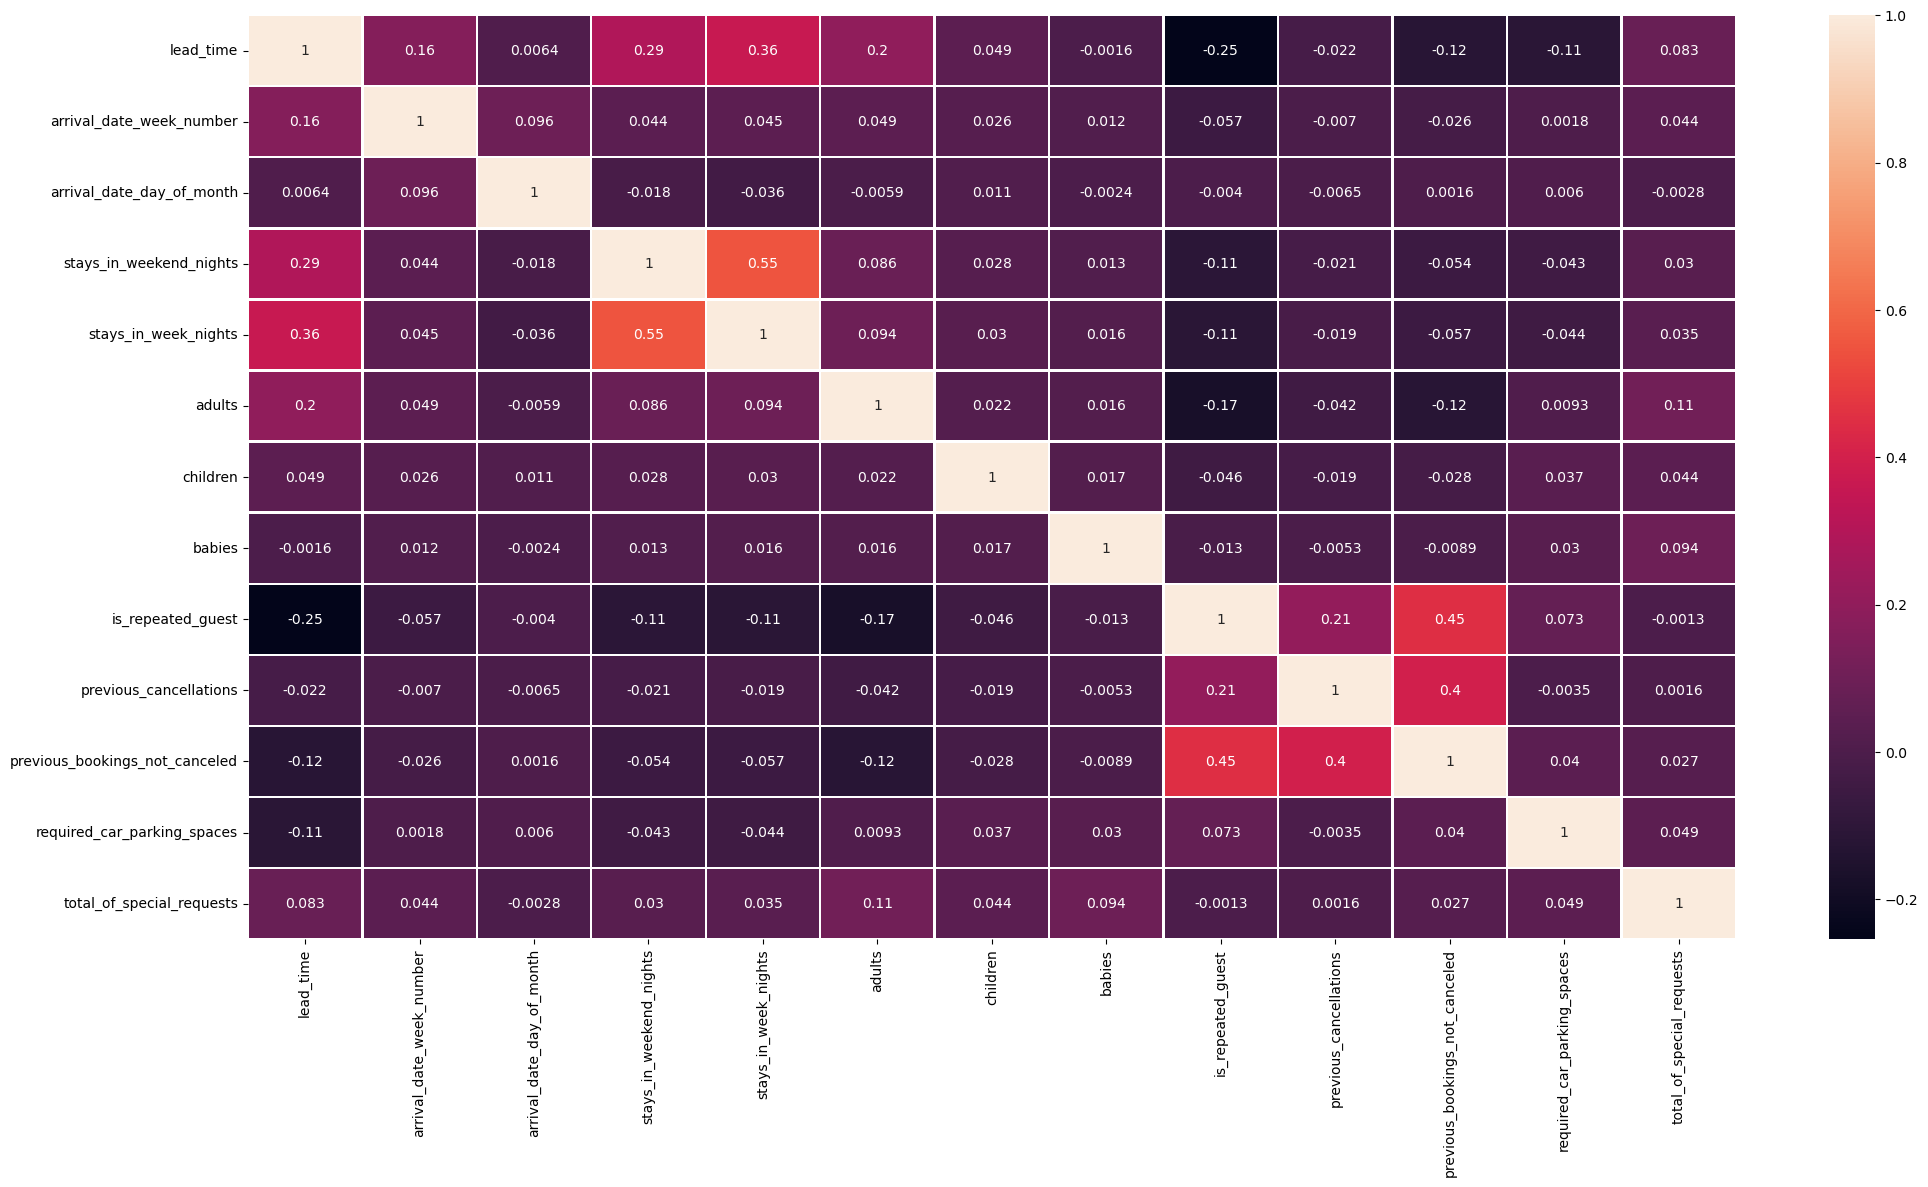

In [32]:
plt.figure(figsize = (24, 12))

corr = num_df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [33]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df_hotel_lr['is_canceled']

from sklearn import neighbors#, datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 )
                                                    
print("Training size: %d" %len(y_train))
print("Test size : %d" %len(y_test))

Training size: 60860
Test size : 26084


In [34]:
# Sử dụng RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.941151663855237
Confusion Matrix : 
[[18730   115]
 [ 1420  5819]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18845
           1       0.98      0.80      0.88      7239

    accuracy                           0.94     26084
   macro avg       0.96      0.90      0.92     26084
weighted avg       0.94      0.94      0.94     26084



In [35]:
input_customer = {
  'hotel':['Resort Hotel'],                
  'meal':['BB'],                           
  'market_segment':['Online TA'],                  
  'distribution_channel':['TA/TO'],            
  'reserved_room_type':['D'],             
  'deposit_type':['No Deposit'],                    
  'customer_type':['Transient'],                   
  'year':[2015],                            
  'month':[6],                          
  'day':[19],                            
  'lead_time':[45],                       
  'arrival_date_week_number':[27],        
  'arrival_date_day_of_month':[2],       
  'stays_in_weekend_nights':[1],         
  'stays_in_week_nights':[3],            
  'adults':[3],                          
  'children':[0],                        
  'babies':[0],                          
  'is_repeated_guest':[0],               
  'previous_cancellations':[0],          
  'previous_bookings_not_canceled':[0], 
  'required_car_parking_spaces':[0],     
  'total_of_special_requests':[1],      
}

input_df = pd.DataFrame(input_customer)

input_df['lead_time'] = np.log(input_df['lead_time'] + 1)
input_df['arrival_date_week_number'] = np.log(input_df['arrival_date_week_number'] + 1)
input_df['arrival_date_day_of_month'] = np.log(input_df['arrival_date_day_of_month'] + 1)

columns_convert = ['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type', 'year']

dict_map = {
  'hotel':{'Resort Hotel': 0, 'City Hotel': 1}, 
  'meal':{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}, 
  'market_segment':{'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7}, 
  'distribution_channel':{'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4},
  'reserved_room_type':{'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'P': 8, 'B': 9}, 
  'deposit_type':{'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2}, 
  'customer_type':{'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3}, 
  'year':{2015: 0, 2014: 1, 2016: 2, 2017: 3},
}

for col in columns_convert:
  input_df[col] = input_df[col].map(dict_map[col])

In [37]:
y_pred_rd_clf = rd_clf.predict_proba(input_df)

print(f"Tỉ lệ hủy phòng là 'Có' chiếm: {round((y_pred_rd_clf[0][1])*100)}% \nTỉ lệ hủy phòng là 'Không' chiếm: {round(y_pred_rd_clf[0][0]*100)}%")

Tỉ lệ hủy phòng là 'Có' chiếm: 87% 
Tỉ lệ hủy phòng là 'Không' chiếm: 13%
